# Exploration vs Exploitation tradeoff in Multi-Armed bandits

This notebook explores the concept of exlporation vs exploitation tradeoff in multi-armed bandits using both epsilon-greedy and Softmax-Sampling based action selection mechainsms.

This notebook is written to implement the example exercise 2.2 from Chap.2 (Evaluative Feedback) in Reinforcement Learning by Sutton & Barto.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_bandits = 2000
n = 10
T = 1000

def gen_env_rewards():
    #Setting up the true reward distributions
    Q_star = np.zeros((num_bandits,n))
    for b_iter  in range(num_bandits):    
        for i in range(n):
            Q_star[b_iter,i] = np.random.randn()
    return Q_star

## $$\epsilon-\ greedy\ algorithm$$

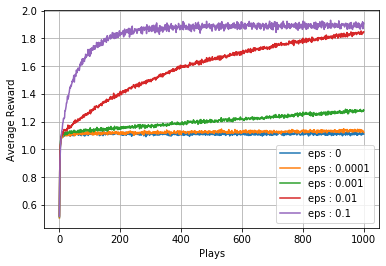

In [3]:
legend_list = []
eps_list = [0,0.0001,0.001,0.01,0.1]
Q_star = gen_env_rewards()
for eps in eps_list:
    rewards = []
    for b_iter in range(num_bandits):
        Q_b = [np.zeros(n),np.zeros(n)] # first array stores the Values and second stores the number of times the arm was selected.
        reward_bandit = []
        for t in range(T):
            if(np.random.rand() > eps):
                a_play = np.argmax(Q_b[0]) #Select the greediest action.        
            else:
                a_play = np.random.randint(n) #Select the action uniformly at random.
            reward_bandit.append(np.random.rand()+Q_star[b_iter,a_play]) # the reward is sampled from a gaussian distribution.
            Q_b[0][a_play ]  = (Q_b[0][a_play]*Q_b[1][a_play] + reward_bandit[-1])/(Q_b[1][a_play]+1)
            Q_b[1][a_play]  += 1
        rewards.append(np.array(reward_bandit))
    rewards = np.array(rewards)   
    avg_rewards = np.mean(rewards,axis=0)
    total_rewards = np.sum(np.mean(rewards, axis=0))
    plt.plot(np.arange(avg_rewards.shape[0])+1, avg_rewards)
    legend_list.append('eps : '+ str(eps))
plt.grid()
plt.xlabel('Plays')
plt.ylabel('Average Reward')
plt.legend(legend_list)
plt.show()

## Softmax Action selection

/home/bhargava/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/bhargava/anaconda3/envs/torch/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


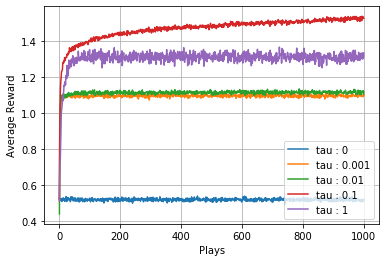

In [4]:
from scipy.special import softmax

legend_list = []
for tau in [0,0.001,0.01,0.1,1]:
    rewards = []
    for b_iter in range(num_bandits):
        Q_b = [np.zeros(n),np.zeros(n)] # first array stores the Values and second stores the number of times the arm was selected.
        reward_bandit = []
        for t in range(T):
            p_vals = softmax(Q_b[0]/tau)
            if not np.isnan(p_vals).any():
                a_play = np.argmax(np.random.multinomial(1,pvals=p_vals))
            else:
                a_play = 0
            reward_bandit.append(np.random.rand()+Q_star[b_iter,a_play]) # the reward is sampled from a gaussian distribution.
            Q_b[0][a_play ]  = (Q_b[0][a_play]*Q_b[1][a_play] + reward_bandit[-1])/(Q_b[1][a_play]+1)
            Q_b[1][a_play]  += 1
        rewards.append(np.array(reward_bandit))
    rewards = np.array(rewards)   
    avg_rewards = np.mean(rewards,axis=0)
    plt.plot(np.arange(avg_rewards.shape[0])+1, avg_rewards)
    legend_list.append('tau : '+ str(tau))
plt.grid()
plt.xlabel('Plays')
plt.ylabel('Average Reward')
plt.legend(legend_list)
plt.show()


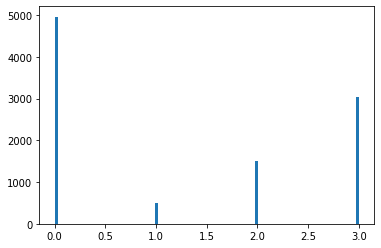